# pull original data from folders via data generators

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from shutil import copyfile

### create the directory structure

create a folder structure 

+ Master_folder
    + Train
        + Cats
        + Dogs
    + Test
        + Cats
        + Dogs
    + Validation
        + Cats
        + Dogs

In [3]:
pwd_ = os.getcwd()

In [4]:
#path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(pwd_))))))

path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(pwd_))))))
print(path)

D:\


In [5]:
src_data_folder = os.path.join(os.path.join(path, "Warehouse"), "train")

cat_src_data_folder = os.path.join(src_data_folder, "cat")
dog_src_data_folder = os.path.join(src_data_folder, "dog")

#cat_src_data_folder

In [6]:
dest_data_folder = os.path.join(os.path.join(path, "Warehouse"), "cats_and_dogs")

if not os.path.exists(dest_data_folder):
    os.mkdir(dest_data_folder)

In [7]:
train_dir = os.path.join(dest_data_folder, "train")
cat_train_dir = os.path.join(train_dir, "cat")
dog_train_dir = os.path.join(train_dir, "dog")


test_dir = os.path.join(dest_data_folder, "test")
cat_test_dir = os.path.join(test_dir, "cat")
dog_test_dir = os.path.join(test_dir, "dog")


validation_dir = os.path.join(dest_data_folder, "validation")
cat_validation_dir = os.path.join(validation_dir, "cat")
dog_validation_dir = os.path.join(validation_dir, "dog")


In [8]:
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

if not os.path.exists(cat_train_dir):
    os.mkdir(cat_train_dir)
    
if not os.path.exists(dog_train_dir):
    os.mkdir(dog_train_dir)
    

    
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
if not os.path.exists(cat_test_dir):
    os.mkdir(cat_test_dir)
    
if not os.path.exists(dog_test_dir):
    os.mkdir(dog_test_dir)
    

    
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
if not os.path.exists(cat_validation_dir):
    os.mkdir(cat_validation_dir)
    
if not os.path.exists(dog_validation_dir):
    os.mkdir(dog_validation_dir)

### transfer files

In [9]:
# first train files

fnames = ["cat.{}.jpg".format(i) for i in range(0,2000)]

for fname in fnames:
    src = os.path.join(cat_src_data_folder, fname)
    dest = os.path.join(cat_train_dir, fname)
    copyfile(src, dest)

In [10]:
fnames = ["dog.{}.jpg".format(i) for i in range(0,2000)]

for fname in fnames:
    src = os.path.join(dog_src_data_folder, fname)
    dest = os.path.join(dog_train_dir, fname)
    copyfile(src, dest)

In [11]:
# now  test files

fnames = ["cat.{}.jpg".format(i) for i in range(2000, 3000)]

for fname in fnames:
    src = os.path.join(cat_src_data_folder, fname)
    dest = os.path.join(cat_test_dir, fname)
    copyfile(src, dest)
    
fnames = ["dog.{}.jpg".format(i) for i in range(2000, 3000)]

for fname in fnames:
    src = os.path.join(dog_src_data_folder, fname)
    dest = os.path.join(dog_test_dir, fname)
    copyfile(src, dest)

In [12]:
# now validation files

fnames = ["cat.{}.jpg".format(i) for i in range(3000, 4000)]

for fname in fnames:
    src = os.path.join(cat_src_data_folder, fname)
    dest = os.path.join(cat_validation_dir, fname)
    copyfile(src, dest)
    
fnames = ["dog.{}.jpg".format(i) for i in range(3000, 4000)]

for fname in fnames:
    src = os.path.join(dog_src_data_folder, fname)
    dest = os.path.join(dog_validation_dir, fname)
    copyfile(src, dest)

In [13]:
print(len(os.listdir(cat_train_dir)))
print(len(os.listdir(dog_train_dir)))
print("\n")

print(len(os.listdir(cat_test_dir)))
print(len(os.listdir(dog_test_dir)))
print("\n")

print(len(os.listdir(cat_validation_dir)))
print(len(os.listdir(dog_validation_dir)))
print("\n")

2000
2000


1000
1000


1000
1000




### get the data generators in place

In [14]:
from keras.preprocessing.image import ImageDataGenerator

c:\users\a00439512\appdata\local\continuum\anaconda3\envs\demo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
train_DG = ImageDataGenerator(rescale=1./255)

valid_DG = ImageDataGenerator(rescale=1./255)

In [16]:
t_DG = train_DG.flow_from_directory(
    train_dir,
    target_size=(150,150), 
    batch_size = 20,
    class_mode='binary'
)

v_DG = valid_DG.flow_from_directory(
    validation_dir,
    target_size=(150,150), 
    batch_size = 20,
    class_mode='binary'
)


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### get the network


In [17]:
from keras.models import Sequential
from keras import layers

In [18]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())


model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       295168    
__________

In [20]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

In [21]:
history = model.fit_generator(
            t_DG,
            steps_per_epoch=1,
            epochs=30,
            validation_data = v_DG,
            validation_steps=50
)

Epoch 1/30
1/1 [==============================] - 27s 27s/step - loss: 0.6897 - acc: 0.6500 - val_loss: 2.0373 - val_acc: 0.5010
Epoch 2/30
1/1 [==============================] - 26s 26s/step - loss: 2.5500 - acc: 0.4000 - val_loss: 0.6982 - val_acc: 0.4990
Epoch 3/30
1/1 [==============================] - 26s 26s/step - loss: 0.6521 - acc: 0.7000 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 4/30
1/1 [==============================] - 26s 26s/step - loss: 0.6848 - acc: 0.6500 - val_loss: 0.6968 - val_acc: 0.5000
Epoch 5/30
1/1 [==============================] - 28s 28s/step - loss: 0.6863 - acc: 0.6000 - val_loss: 0.6974 - val_acc: 0.4940
Epoch 6/30
1/1 [==============================] - 26s 26s/step - loss: 0.7039 - acc: 0.4500 - val_loss: 0.6943 - val_acc: 0.5060
Epoch 7/30
1/1 [==============================] - 29s 29s/step - loss: 0.7025 - acc: 0.4000 - val_loss: 0.6931 - val_acc: 0.5190
Epoch 8/30
1/1 [==============================] - 27s 27s/step - loss: 0.6940 - acc: 0.5000 - val

### Section 6
    
    Plotting

In [22]:
import matplotlib.pyplot as plt

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
epochs = range(1, len(acc) + 1)

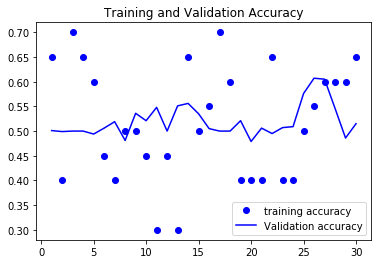

In [25]:
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()


In [26]:
plt.figure()

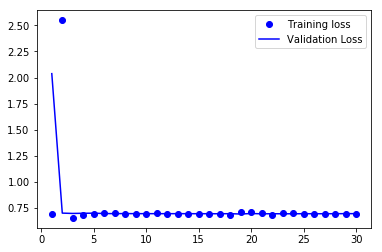

In [27]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.legend()

In [28]:
plt.show()